In [3]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot
import cufflinks as cf
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
pd.set_option("max_columns", None)
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')


In [4]:
data=pd.read_csv('/Users/carrie/IronHack/Final_Project/Encoded_Data/data_encode.csv').iloc[:,1:]
data

Education  Marital_Status  Yearly_Income  Recency_(days)  Wines  Fruits  \
0             0               3        58138.0              58    635      88   
1             0               3        46344.0              38     11       1   
2             0               0        71613.0              26    426      49   
3             0               0        26646.0              26     11       4   
4             2               2        58293.0              94    173      43   
...         ...             ...            ...             ...    ...     ...   
2231          0               2        61223.0              46    709      43   
2232          2               0        64014.0              56    406       0   
2233          0               1        56981.0              91    908      48   
2234          1               0        69245.0               8    428      30   
2235          2               2        52869.0              40     84       3   

      Meat  Fish  Sweets  Gold  Discount_Deal  Web_Deal  Catalog_Deal  \
0      546   172      88    88              3         8            10   
1        6     2       1     6              2         1             1   
2      127   111      21    42              1         8             2   
3       20    10       3     5              2         2             0   
4      118    46      27    15              5         5             3   
...    ...   ...     ...   ...            ...       ...           ...   
2231   182    42     118   247              2         9             3   
2232    30     0       0     8              7         8             2   
2233   217    32      12    24              1         2             3   
2234   214    80      30    61              2         6             5   
2235    61     2       1    21              3         3             1   

      Store_Deal  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0              4                  7             0             0             0   
1              2                  5             0             0             0   
2             10                  4             0             0             0   
3              4                  6             0             0             0   
4              6                  5             0             0             0   
...          ...                ...           ...           ...           ...   
2231           4                  5             0             0             0   
2232           5                  7             0             0             0   
2233          13                  6             0             1             0   
2234          10                  3             0             0             0   
2235           4                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0                0             0         0         1   57   
1                0             0         0         0   60   
2                0             0         0         0   49   
3                0             0         0         0   30   
4                0             0         0         0   33   
...            ...           ...       ...       ...  ...   
2231             0             0         0         0   47   
2232             1             0         0         0   68   
2233             0             0         0         0   33   
2234             0             0         0         0   58   
2235             0             0         0         1   60   

      Client_since_(month)  Spending  Total_Deal_nondiscount  Children  \
0                     33.2      1617                      22         0   
1                      5.0        27                       4         2   
2                     16.6       776                      20         0   
3                      3.0        53                       6         1   
4                     11.5       422                      14         1   
...   

In [5]:
# first clustering: cluster clients by spending and yearly income 

# Scale my data

In [6]:
df = data.copy()

scaler = StandardScaler()
scaler.fit(df)
scaled_data = pd.DataFrame(scaler.transform(df), columns=df.columns)
scaled_data

Education  Marital_Status  Yearly_Income  Recency_(days)     Wines  \
0     -0.869141        1.222432       0.288195        0.306856  0.983228   
1     -0.869141        1.222432      -0.262715       -0.383971 -0.871064   
2     -0.869141       -1.457331       0.917627       -0.798467  0.362159   
3     -0.869141       -1.457331      -1.182829       -0.798467 -0.871064   
4      0.977319        0.329178       0.295435        1.550344 -0.389661   
...         ...             ...            ...             ...       ...   
2231  -0.869141        0.329178       0.432299       -0.107640  1.203128   
2232   0.977319       -1.457331       0.562669        0.237773  0.302727   
2233  -0.869141       -0.564077       0.234150        1.446720  1.794481   
2234   0.054089       -1.457331       0.807015       -1.420212  0.368102   
2235   0.977319        0.329178       0.042075       -0.314889 -0.654136   

        Fruits      Meat      Fish    Sweets      Gold  Discount_Deal  \
0     1.554170  1.679746  2.461068  1.475396  0.845669       0.348738   
1    -0.636431 -0.713455 -0.650414 -0.631638 -0.729742      -0.168700   
2     0.572177 -0.177201  1.344595 -0.147262 -0.038098      -0.686137   
3    -0.560893 -0.651409 -0.503991 -0.583200 -0.748954      -0.168700   
4     0.421101 -0.217088  0.154911 -0.001950 -0.556831       1.383614   
...        ...       ...       ...       ...       ...            ...   
2231  0.421101  0.066551  0.081700  2.201960  3.900428      -0.168700   
2232 -0.661610 -0.607091 -0.687019 -0.655857 -0.691317       2.418490   
2233  0.546997  0.221666 -0.101329 -0.365231 -0.383920      -0.686137   
2234  0.093769  0.208371  0.777208  0.070707  0.326936      -0.168700   
2235 -0.586072 -0.469703 -0.650414 -0.631638 -0.441557       0.348738   

      Web_Deal  Catalog_Deal  Store_Deal  NumWebVisitsMonth  AcceptedCmp3  \
0     1.407639      2.509801   -0.552429           0.692865      -0.28041   
1    -1.110921     -0.568970   -1.167738          -0.131421      -0.28041   
2     1.407639     -0.226884    1.293496          -0.543564      -0.28041   
3    -0.751127     -0.911056   -0.552429           0.280722      -0.28041   
4     0.328256      0.115201    0.062879          -0.131421      -0.28041   
...        ...           ...         ...                ...           ...   
2231  1.767433      0.115201   -0.552429          -0.131421      -0.28041   
2232  1.407639     -0.226884   -0.244775           0.692865      -0.28041   
2233 -0.751127      0.115201    2.216459           0.280722      -0.28041   
2234  0.688050      0.799373    1.293496          -0.955707      -0.28041   
2235 -0.391333     -0.568970   -0.552429           0.692865      -0.28041   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
1        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
2        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
3        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
4        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
...            ...           ...           ...           ...       ...   
2231     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
2232     -0.284104     -0.279482      3.811532     -0.116616 -0.095001   
2233      3.519833     -0.279482     -0.262362     -0.116616 -0.095001   
2234     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
2235     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   

      Response       Age  Client_since_(month)  Spending  \
0     2.386338  1.016868              1.975387  1.680176   
1    -0.419052  1.273264             -1.666842 -0.962202   
2    -0.419052  0.333146             -0.168620  0.282541   
3    -0.419052 -1.290693             -1.925156 -0.918994   
4    -0.419052 -1.034298             -0.827321 -0.305762   
...        ...       ...                  

# 1st cluster by income & spending using KMEANS

In [52]:
df1 = data[['Yearly_Income','Spending']]

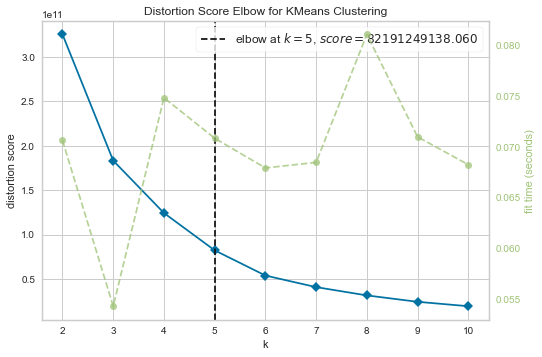

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(df1)
elbow_method.show()
# it shown that when K=4, the cluster is the most optimal

In [55]:
model = KMeans(n_clusters=4).fit(df1)
df['cluster_income_spending'] = model.predict(df1)+1
df['cluster_income_spending'].value_counts()

4    668
1    668
3    455
2    445
Name: cluster_income_spending, dtype: int64

In [56]:
pred1 = model.fit_predict(df1)
score1 = silhouette_score(df1, pred1)
score1

0.5250959565220061

In [57]:
clst1_freq = df[['cluster_income_spending','Yearly_Income']].groupby('cluster_income_spending').agg('count')
clst1_freq=clst1_freq.rename(columns={'Yearly_Income':'Frequency'})
clst1_freq

Frequency
cluster_income_spending           
1                              668
2                              445
3                              455
4                              668

In [58]:
fig = px.bar(clst1_freq, x=clst1_freq.index, y=clst1_freq['Frequency'], barmode='group')
fig.show()

In [59]:
fig = px.scatter(df, x="Yearly_Income", y="Spending", color='cluster_income_spending',size='Spending', width=800, height=800)
fig.show()

<Figure size 1008x576 with 0 Axes>

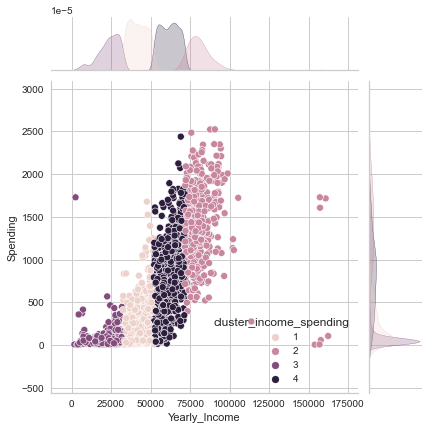

In [60]:
plt.figure(figsize=(14,8))
sns.jointplot(x=df["Yearly_Income"], y=df["Spending"], hue=df["cluster_income_spending"])

In [13]:
#Group 1: low spend - high income
#Group 2: high spend - high income
#Group 3: low spend - low income
#Group 4: low spend - avg income

In [61]:
cat_clust =df[['cluster_income_spending','Wines','Meat','Fish','Fruits','Sweets','Gold']].groupby('cluster_income_spending',as_index=False).agg('mean')
cat_clust

cluster_income_spending       Wines        Meat       Fish     Fruits  \
0                        1  116.211078   48.275449  13.170659   8.005988   
1                        2  652.732584  463.977528  91.867416  63.456180   
2                        3   17.145055   20.817582   7.993407   5.520879   
3                        4  455.288922  187.402695  45.830838  33.914671   

      Sweets       Gold  
0   8.176647  26.946108  
1  67.600000  72.716854  
2   5.738462  16.250549  
3  33.528443  60.767964

In [62]:
fig = px.bar(cat_clust, x='cluster_income_spending', y=['Wines','Meat','Fish','Fruits','Sweets','Gold'], title="avg catogories spending per cluster")
fig.show()

# for Wine & Meat, cluster 2 spent the most in average, then cluster 4

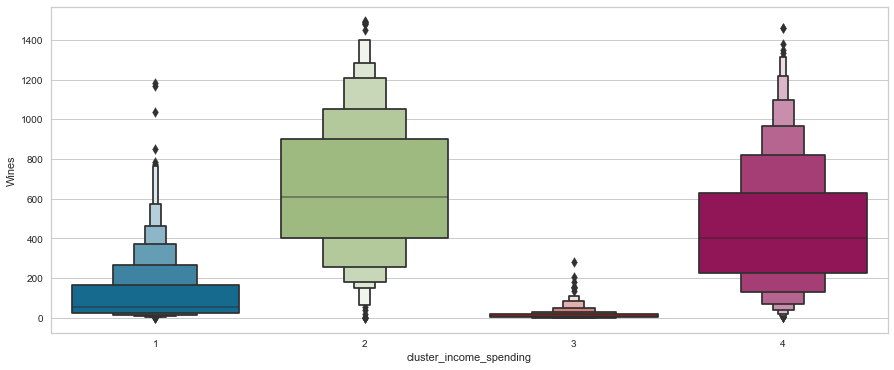

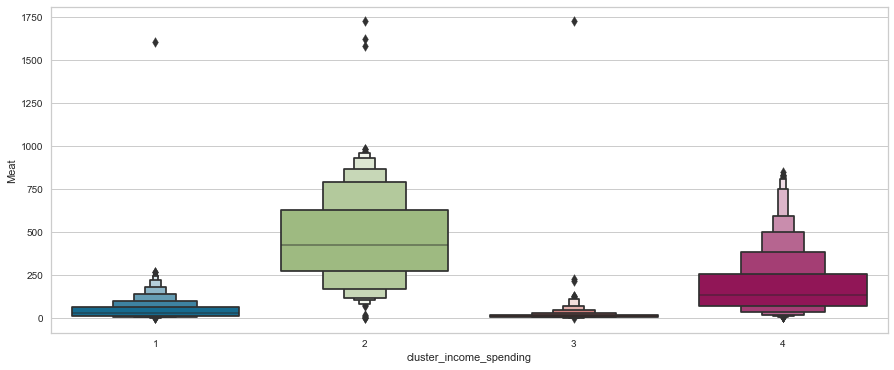

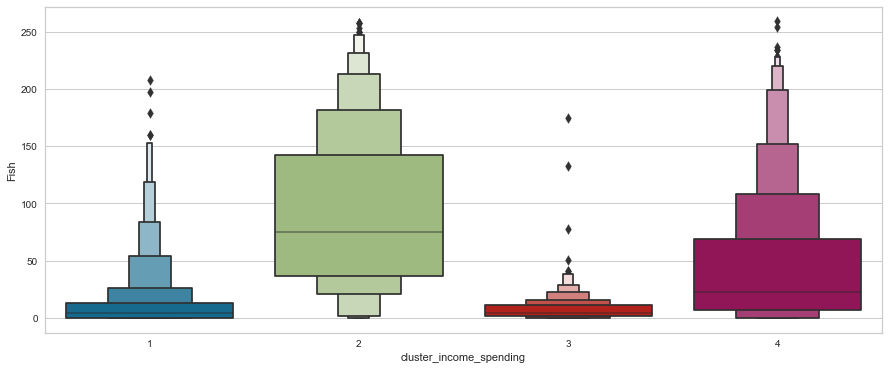

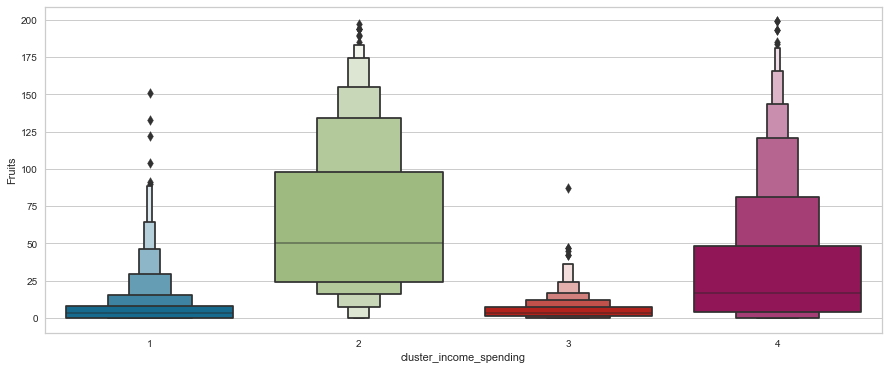

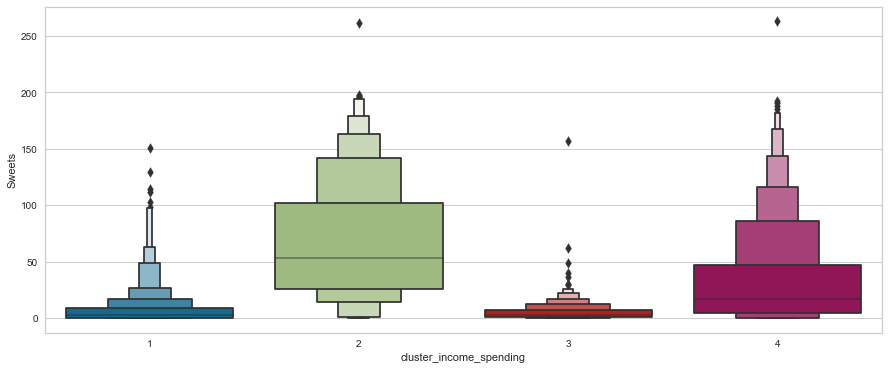

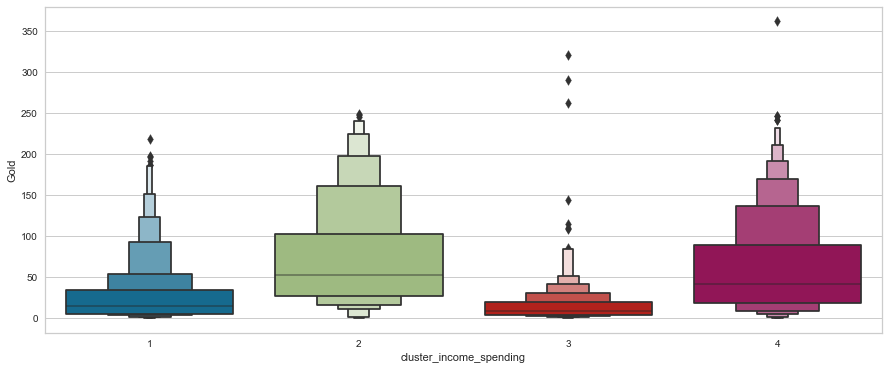

In [63]:
cat = ['Wines','Meat','Fish','Fruits','Sweets','Gold']
for i in cat:
    plt.figure(figsize=(15,6))
    sns.boxenplot(x="cluster_income_spending", y=i,data=df);

# gold: cluster 2 & 4 have almost the same spending 

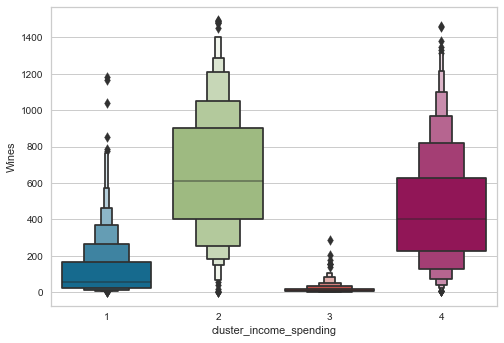

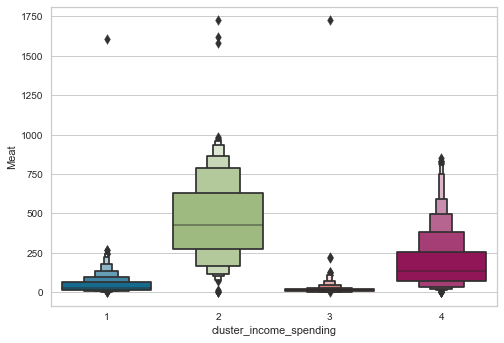

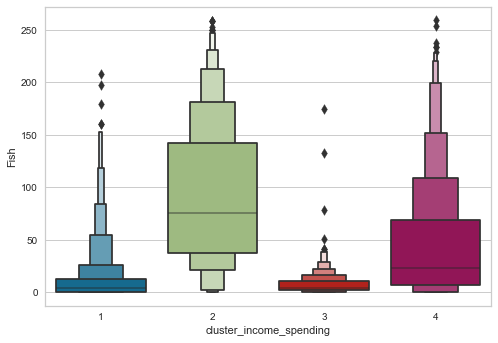

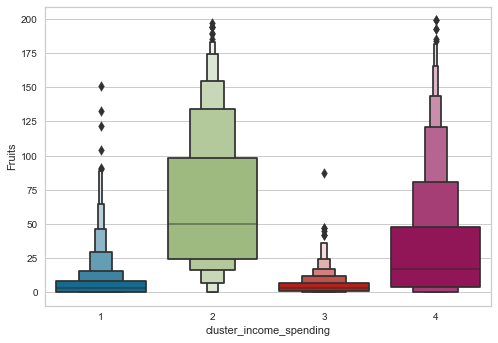

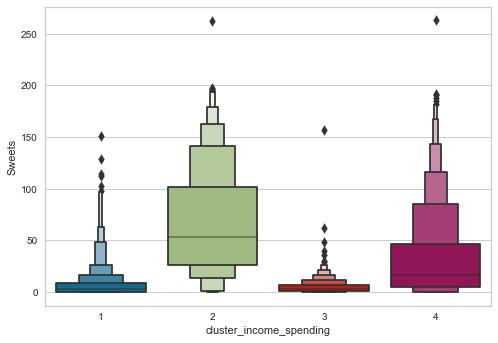

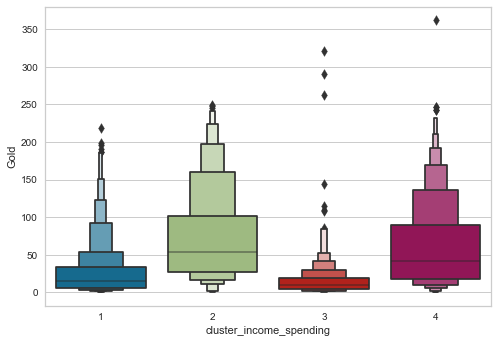

In [68]:
cat = ['Wines','Meat','Fish','Fruits','Sweets','Gold']

for i in cat:
    sns.boxenplot(x="cluster_income_spending", y=i,data=df)
    plt.show()

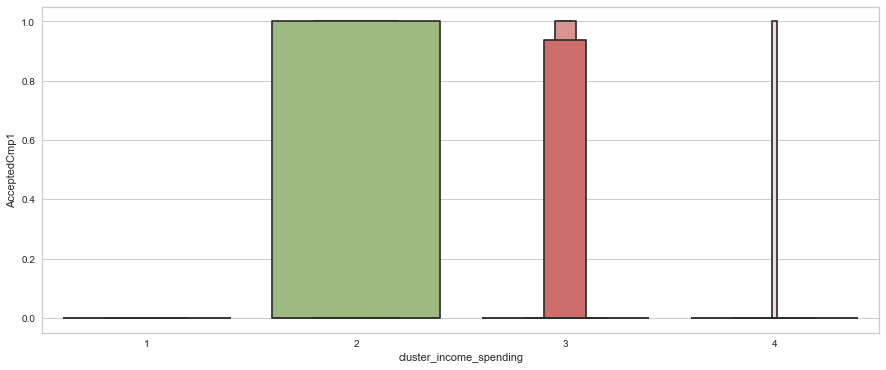

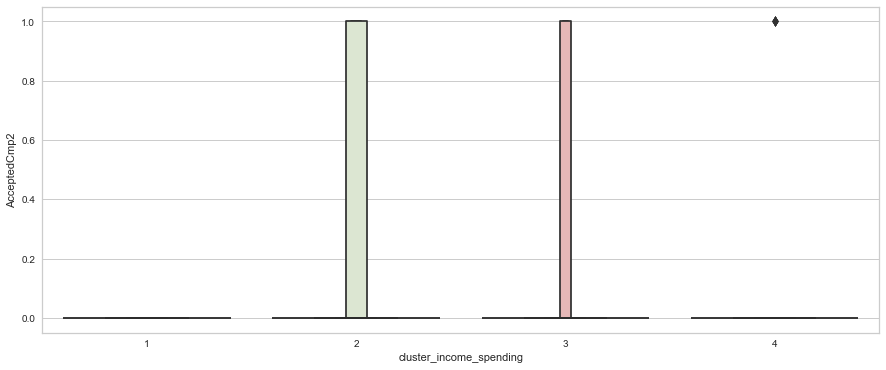

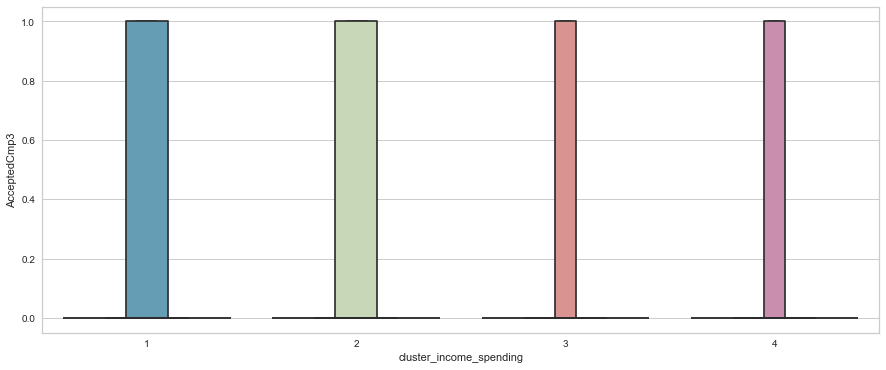

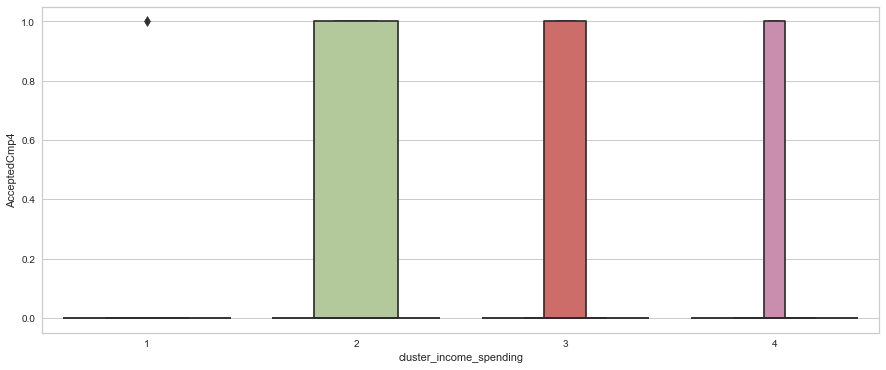

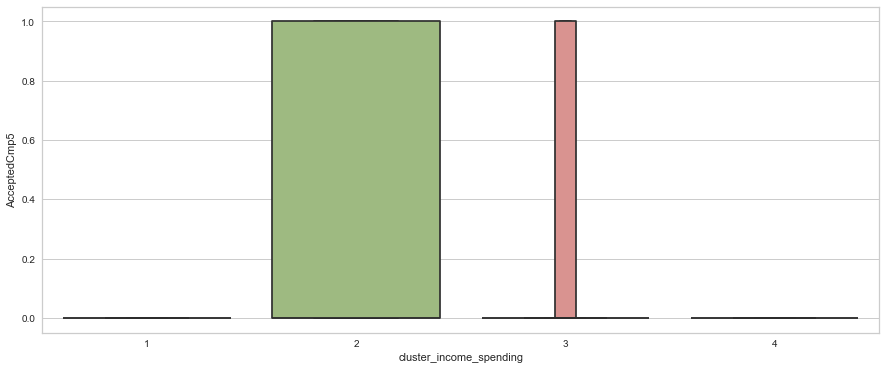

In [18]:
camp = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
for i in camp:
    plt.figure(figsize=(15,6))
    sns.boxenplot(x="cluster_income_spending", y=i,data=df);

# group 1&3 not quite accepted campaignes given this way of clustering
# camp 3 is more accepted by all clusters
# camp 1 & 4 workd very well for cluster 2

In [69]:
#clst1_total_camp = df[['cluster_income_spending','total_cmp_accepted','Yearly_Income']].groupby(['cluster_income_spending','total_cmp_accepted']).agg('count')
clst1_total_camp = df[['cluster_income_spending','total_cmp_accepted','Yearly_Income']].pivot_table(index='cluster_income_spending', columns='total_cmp_accepted', values='Yearly_Income', aggfunc='count')
clst1_camp=clst1_total_camp.rename(columns={'Yearly_Income':'freq'})
clst1_camp

total_cmp_accepted           0      1     2     3     4
cluster_income_spending                                
1                        586.0   74.0   7.0   1.0   NaN
2                        229.0  109.0  58.0  39.0  10.0
3                        418.0   37.0   NaN   NaN   NaN
4                        541.0  104.0  18.0   4.0   1.0

Text(0, 0.5, 'frequency')

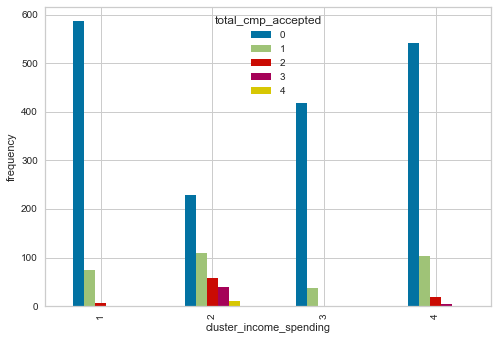

In [70]:
clst1_camp.plot(kind='bar')
plt.ylabel('frequency')
#no obvious pattern found given this way of clustering, too few clients accpted the campaigne

In [71]:
clst1_deals1 = df[['cluster_income_spending','Discount_Deal']].groupby('cluster_income_spending').agg('mean')
clst1_deals2 = df[['cluster_income_spending','Total_Deal_nondiscount']].groupby('cluster_income_spending').agg('mean')

result = pd.concat([clst1_deals1, clst1_deals2], axis=1)
result
#clst1_deals = df[['cluster_income_spending','Discount_Deal','Total_Deal_nondiscount']].groupby('cluster_income_spending').agg('count')

Discount_Deal  Total_Deal_nondiscount
cluster_income_spending                                       
1                             2.664671                8.434132
2                             1.319101               19.447191
3                             2.032967                5.290110
4                             2.857784               17.004491

<Figure size 576x396 with 0 Axes>

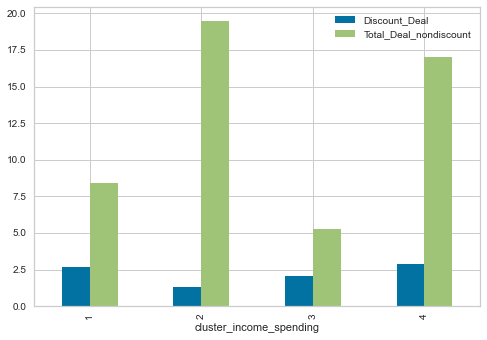

In [72]:
plt.figure()
result.plot(kind='bar')
plt.show()

In [73]:
#sns.barplot(data=df, x='Education',y='Marital_Status',hue='cluster_income_spending')
# no obvious finding about their marital status & education

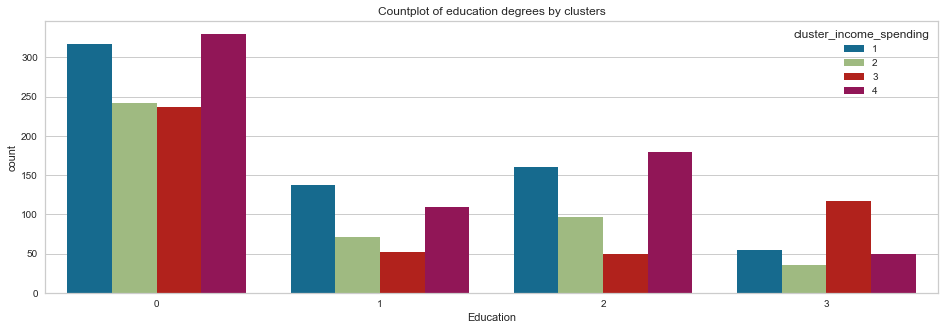

In [74]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of education degrees by clusters')
sns.countplot(data=df, x='Education', hue='cluster_income_spending')
plt.show()

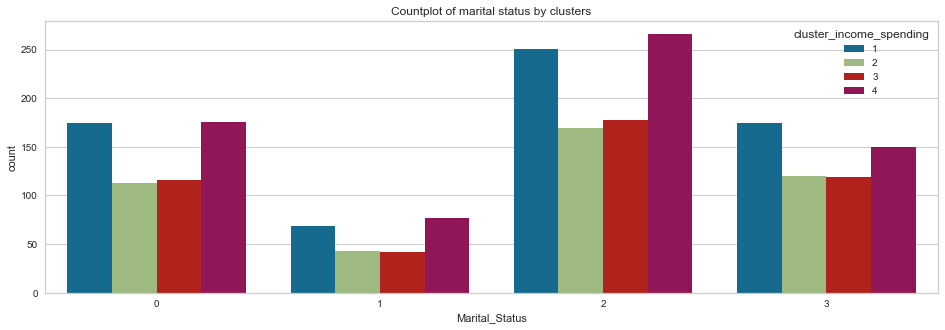

In [75]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of marital status by clusters')
sns.countplot(data=df, x='Marital_Status', hue='cluster_income_spending')
plt.show()

# 2nd cluster by PCA on people & product & place cols

In [31]:
df.columns

Index(['Education', 'Marital_Status', 'Yearly_Income', 'Recency_(days)',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Discount_Deal',
       'Web_Deal', 'Catalog_Deal', 'Store_Deal', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Client_since_(month)',
       'Spending', 'Total_Deal_nondiscount', 'Children', 'total_cmp_accepted'],
      dtype='object')

In [33]:
df2 = df[['Education', 'Marital_Status', 'Yearly_Income', 'Recency_(days)',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 
       'Web_Deal', 'Catalog_Deal', 'Store_Deal', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Client_since_(month)',
       'Spending', 'Total_Deal_nondiscount', 'Children']]
df2

Education  Marital_Status  Yearly_Income  Recency_(days)  Wines  Fruits  \
0             0               3        58138.0              58    635      88   
1             0               3        46344.0              38     11       1   
2             0               0        71613.0              26    426      49   
3             0               0        26646.0              26     11       4   
4             2               2        58293.0              94    173      43   
...         ...             ...            ...             ...    ...     ...   
2231          0               2        61223.0              46    709      43   
2232          2               0        64014.0              56    406       0   
2233          0               1        56981.0              91    908      48   
2234          1               0        69245.0               8    428      30   
2235          2               2        52869.0              40     84       3   

      Meat  Fish  Sweets  Gold  Web_Deal  Catalog_Deal  Store_Deal  \
0      546   172      88    88         8            10           4   
1        6     2       1     6         1             1           2   
2      127   111      21    42         8             2          10   
3       20    10       3     5         2             0           4   
4      118    46      27    15         5             3           6   
...    ...   ...     ...   ...       ...           ...         ...   
2231   182    42     118   247         9             3           4   
2232    30     0       0     8         8             2           5   
2233   217    32      12    24         2             3          13   
2234   214    80      30    61         6             5          10   
2235    61     2       1    21         3             1           4   

      NumWebVisitsMonth  Complain  Response  Age  Client_since_(month)  \
0                     7         0         1   57                  33.2   
1                     5         0         0   60                   5.0   
2                     4         0         0   49                  16.6   
3                     6         0         0   30                   3.0   
4                     5         0         0   33                  11.5   
...                 ...       ...       ...  ...                   ...   
2231                  5         0         0   47                  18.9   
2232                  7         0         0   68                   2.9   
2233                  6         0         0   33                  11.3   
2234                  3         0         0   58                  11.4   
2235                  7         0         1   60                  26.9   

      Spending  Total_Deal_nondiscount  Children  
0         1617                      22         0  
1           27                       4         2  
2          776                      20         0  
3           53                       6         1  
4          422                      14         1  
...        ...                     ...       ...  
2231      1341                      16         1  
2232       444                      15         3  
2233      1241                      18         0  
2234       843                      21         1  
2235       172                       8         2  

[2236 rows x 21 columns]

### Clsutering using KMeans

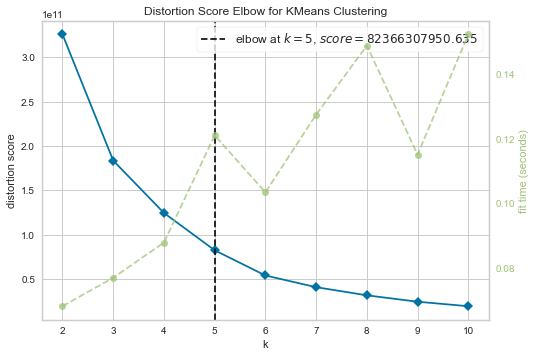

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(df2)
elbow_method.show()
# shows that k=5 is the optimal , but when I did the count of each cluster, last cluster only have 5 datapoint, so I will keep with 4 clusters

In [37]:
model = KMeans(n_clusters=4).fit(df2)
df2['cluster_2'] = model.predict(df2)+1
df2['cluster_2'].value_counts()

1    689
2    675
3    459
4    413
Name: cluster_2, dtype: int64

In [38]:
df['cluster_2'] = model.predict(df2)+1

In [163]:
#### pred2 = model.fit_predict(df2)
score2 = silhouette_score(df2, pred2)
score2

0.524109910261841

In [148]:
# to complete the csv for visualisation by adding the col of cluster
#visu = pd.read_csv('/Users/carrie/IronHack/Final_Project/Visualisation/data_clean_visu.csv').iloc[:,1:]
#visu

In [139]:
#visu['Clusters'] = model.predict(df2)+1

In [144]:
#visu['HasChildren'] = (visu['Children'] >= 1).astype('int64')

In [147]:
#visu['HasChildren'] = visu['HasChildren'].replace(0, 'no')
#visu['HasChildren'] = visu['HasChildren'].replace(1, 'yes')
#visu['HasChildren'].value_counts()

In [146]:
#visu.to_csv('/Users/carrie/IronHack/Final_Project/Visualisation/data_clean_visu_with_cluster.csv')

### PCA feature selection & visualisation of clusters

In [41]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df2)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=['pca1','pca2'])
pca_df

pca1        pca2
0      6196.752550 -952.059910
1     -5639.684222  526.059998
2     19643.121754  309.486261
3    -25330.448080   -5.917574
4      6316.791088  392.115028
...            ...         ...
2231   9272.743240 -589.410850
2232  12038.125076  434.397353
2233   5032.010769 -705.922683
2234  17278.012195  171.450951
2235    887.563058  522.877695

[2236 rows x 2 columns]

In [45]:
pca.explained_variance_ratio_.sum()

0.9999075380520303

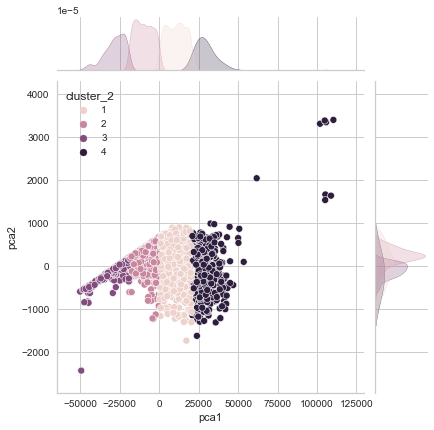

In [42]:
labels = df2['cluster_2']

sns.jointplot(data=pca_df, x='pca1', y='pca2', hue=labels)

In [43]:
pca2 = PCA(n_components=3)
pca_data2 = pca2.fit_transform(df2)
pca_df2 = pd.DataFrame.from_records(data=pca_data2, columns=['pca1','pca2','pca3'])
pca_df2

pca1        pca2        pca3
0      6196.752550 -952.059910  232.640742
1     -5639.684222  526.059998  -14.200978
2     19643.121754  309.486261 -108.993870
3    -25330.448080   -5.917574   40.082429
4      6316.791088  392.115028   11.529284
...            ...         ...         ...
2231   9272.743240 -589.410850 -134.272600
2232  12038.125076  434.397353 -227.045676
2233   5032.010769 -705.922683 -273.823705
2234  17278.012195  171.450951  -37.254270
2235    887.563058  522.877695  -11.923310

[2236 rows x 3 columns]

In [34]:
fig = px.scatter_3d(df2, x=pca_df2['pca1'], y=pca_df2['pca2'], z=pca_df2['pca3'], color=df2['cluster_2'], width=800, height=800)
fig.show()

### Clsutering using Agglomerative Clustering

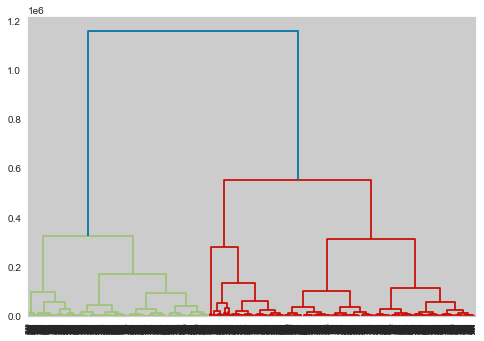

In [35]:
dendrogram = sch.dendrogram(sch.linkage(df2, method='ward'))

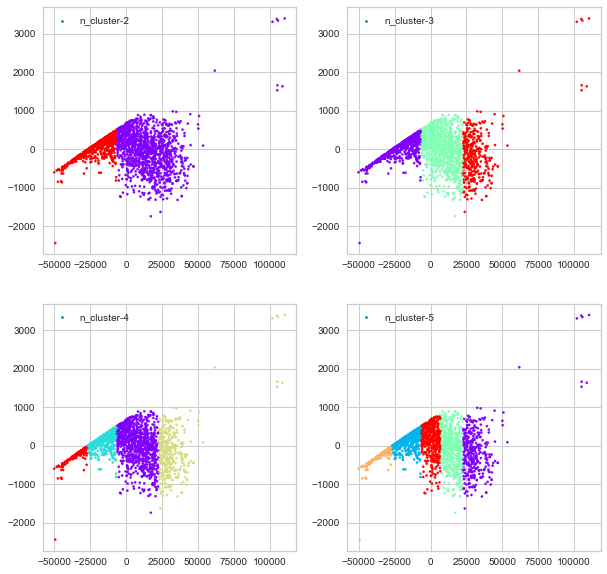

In [36]:
f = plt.figure(figsize=(10,10))
f.add_subplot(2, 2, 1)

for i in range(2, 6):
     aggloclust=AgglomerativeClustering(n_clusters=i).fit(df2)
     f.add_subplot(2, 2, i-1)
     plt.scatter(pca_df2['pca1'], pca_df2['pca2'], s=5, c=aggloclust.labels_, label="n_cluster-"+str(i),cmap='rainbow')
     plt.legend()
plt.show()

In [95]:
model_ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model_ac.fit(df2)
labels_ac = model_ac.labels_
labels_ac

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
unique, counts = np.unique(labels_ac, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 956]
 [  1 668]
 [  2 369]
 [  3 243]]


In [97]:
metrics.silhouette_score(df2, model_ac.labels_)

0.4861102428910823

In [119]:
df['cluster_2_ac'] = labels_ac+1

In [40]:
df2['cluster_2_ac'] = labels_ac+1

fig = px.scatter(df2, x=pca_df2['pca1'], y=pca_df2['pca3'], color=df2['cluster_2'], width=800, height=800)
fig.show()

In [41]:
df2.corr().iloc[:,-2:].sort_values('cluster_2',ascending = False)

cluster_2  cluster_2_ac
cluster_2                 1.000000      0.556869
cluster_2_ac              0.556869      1.000000
NumWebVisitsMonth         0.205968      0.264414
Children                  0.169967      0.227684
cluster_income_spending   0.084681      0.314495
Web_Deal                  0.083091      0.033177
Client_since_(month)      0.052627      0.037705
Store_Deal                0.043618     -0.089664
Education                 0.036113      0.054428
Age                       0.031082      0.060715
Complain                  0.003917     -0.006095
Recency_(days)           -0.015119      0.015995
Total_Deal_nondiscount   -0.020975     -0.123753
Marital_Status           -0.023426      0.017088
Gold                     -0.023454     -0.059582
Wines                    -0.097598     -0.189310
Fruits                   -0.155728     -0.245687
Response                 -0.162433     -0.145402
Catalog_Deal             -0.179198     -0.236861
Sweets                   -0.184053     -0.243379
Fish                     -0.189631     -0.257910
Spending                 -0.210650     -0.300836
Yearly_Income            -0.247984     -0.312193
Meat                     -0.303782     -0.355952

In [42]:
fig = px.scatter_3d(df2, x=df2['Total_Deal_nondiscount'], y=df2['Spending'], z=df2['Yearly_Income'], color=df2['cluster_2_ac'], width=800, height=800)
fig.show()

In [43]:
fig = px.scatter(df2, x=df2['Yearly_Income'], y=df2['Spending'], color=df2['cluster_2'], width=800, height=800)
fig.show()

#### GMM

In [121]:
for i in range(3,9):
    gmm = GaussianMixture(n_components=i, random_state=0)
    gmm.fit(df2)
    print(f'num of cluster: {i}, score: {silhouette_score(df2, gmm.predict(df2))}')

num of cluster: 3, score: 0.23473323449844588
num of cluster: 4, score: 0.524034762221889
num of cluster: 5, score: 0.18284095948582602
num of cluster: 6, score: 0.1965542493416459
num of cluster: 7, score: 0.24473072747242125
num of cluster: 8, score: 0.1587412174696204


#### DBSCAN

In [138]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df2)
distances, indices = nbrs.kneighbors(df2)

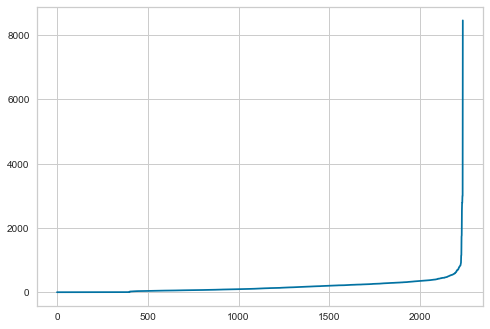

In [124]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

(200.0, 1000.0)

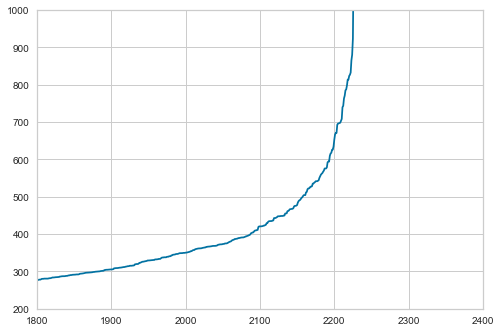

In [139]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlim([1800, 2400])
plt.ylim([200, 1000])

In [162]:
for i in range(2,8):
    m = DBSCAN(eps=850, min_samples=i)
    print(f'num of cluster: {i}, score: {silhouette_score(df2, m.fit_predict(df2))}')

num of cluster: 2, score: 0.060456489918905856
num of cluster: 3, score: 0.058071673969799634
num of cluster: 4, score: 0.057720463102285624
num of cluster: 5, score: 0.05471614186441582
num of cluster: 6, score: 0.003812144527389607
num of cluster: 7, score: 0.028903847403108113


In [173]:
lst = [['KMeans','4', 0.524], ['Agglomerative Clustering', '4', 0.486],
       ['Gaussian Mixture', '4', 0.524], ['DBSCAN', '3', 0.058]]
    
models_results = pd.DataFrame(lst, columns =['Model', 'No. of Clusters', 'Silhouette Score'], dtype = float)
models_results['No. of Clusters']=models_results['No. of Clusters'].astype(int)
models_results

Model  No. of Clusters  Silhouette Score
0                    KMeans                4             0.524
1  Agglomerative Clustering                4             0.486
2          Gaussian Mixture                4             0.524
3                    DBSCAN                3             0.058

#### KMeans have a better silouette score at 0.524, so KMeans clustter is better, I will find the pattern for each cluster for KMeans 

### Find cluster pattern: Clusters_2_KMeans analysis

In [44]:
df2['cluster_2'].value_counts()

4    669
2    668
3    456
1    443
Name: cluster_2, dtype: int64

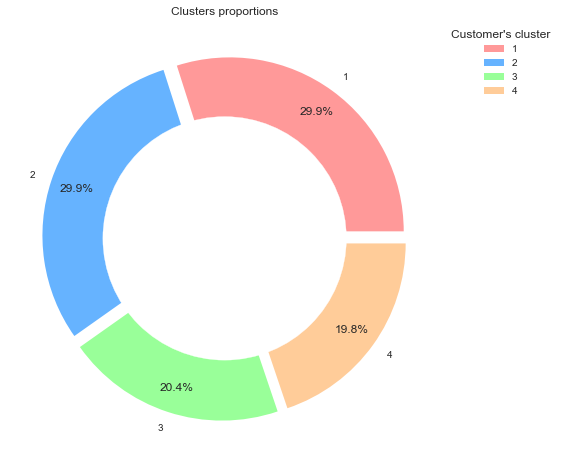

In [45]:
sizes = dict(df2['cluster_2'].value_counts())

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explodes= (0.05,0.05,0.05,0.05)


plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, colors=colors,explode = explodes)
plt.legend(title="Customer's cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [46]:
df2.columns

Index(['Education', 'Marital_Status', 'Yearly_Income', 'Recency_(days)',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web_Deal',
       'Catalog_Deal', 'Store_Deal', 'NumWebVisitsMonth', 'Complain',
       'Response', 'Age', 'Client_since_(month)', 'Spending',
       'Total_Deal_nondiscount', 'Children', 'cluster_income_spending',
       'cluster_2', 'cluster_2_ac'],
      dtype='object')

In [47]:
df2['MntTotal'] = df2['Wines']+df2['Meat']+df2['Fruits']+df2['Fish']+df2['Sweets']+df2['Gold']

In [48]:
df2 = df2.assign(
        percentWines=lambda x: x['Wines'] / x['MntTotal'] * 100,
        percentMeat=lambda x: x['Meat'] / x['MntTotal'] * 100,
        percentFruits=lambda x: x['Fruits'] / x['MntTotal'] * 100,
        percentFish=lambda x: x['Fish'] / x['MntTotal'] * 100,
        percentSweets=lambda x: x['Sweets'] / x['MntTotal'] * 100,
        percentGold=lambda x: x['Gold'] / x['MntTotal'] * 100,
)

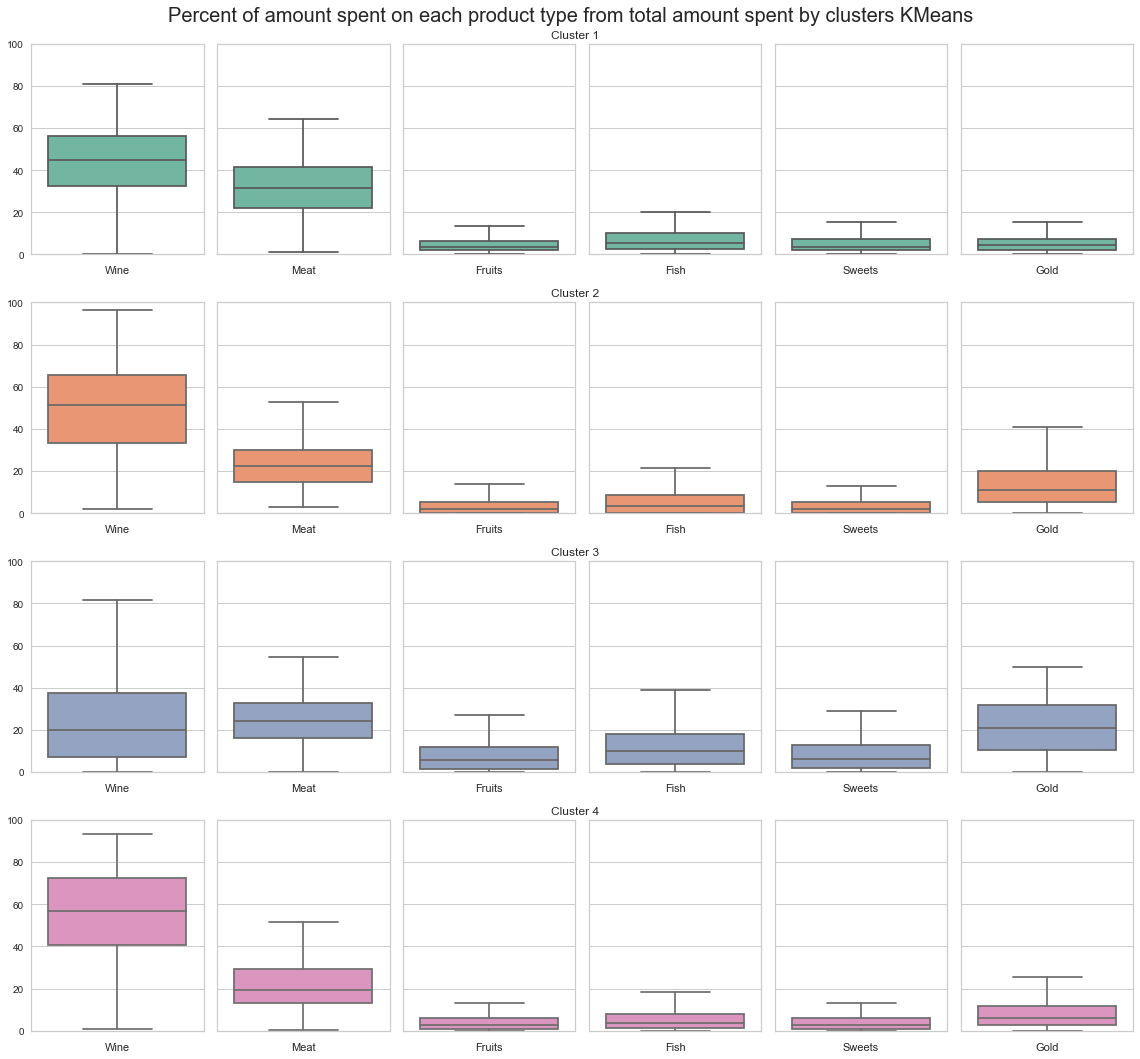

In [49]:
fig, axes = plt.subplots(4, 6, figsize=(16, 15), sharey=True)
fig.suptitle('Percent of amount spent on each product type from total amount spent by clusters KMeans', fontsize=20)
PALETTE = sns.color_palette("Set2")

for i, value in enumerate(sorted(df2['cluster_2'].unique())):
    sns.boxplot(data=df2.query(f'cluster_2 == {value}'), y='percentWines', showfliers=False, color=PALETTE[i], ax=axes[i, 0])
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].set_xlabel('Wine')
    axes[i, 0].set_ylabel('')
    
    sns.boxplot(data=df2.query(f'cluster_2 == {value}'), y='percentMeat', showfliers=False, color=PALETTE[i], ax=axes[i, 1])
    axes[i, 1].set_xlabel('Meat')
    axes[i, 1].set_ylabel('')
    
    sns.boxplot(data=df2.query(f'cluster_2 == {value}'), y='percentFruits', showfliers=False, color=PALETTE[i], ax=axes[i, 2])
    axes[i, 2].set_xlabel('Fruits')
    axes[i, 2].set_ylabel('')
    axes[i, 2].set_title(f'Cluster {value}', x=1)

    sns.boxplot(data=df2.query(f'cluster_2 == {value}'), y='percentFish', showfliers=False, color=PALETTE[i], ax=axes[i, 3])
    axes[i, 3].set_xlabel('Fish')
    axes[i, 3].set_ylabel('')
    
    sns.boxplot(data=df2.query(f'cluster_2 == {value}'), y='percentSweets', showfliers=False, color=PALETTE[i], ax=axes[i, 4])
    axes[i, 4].set_xlabel('Sweets')
    axes[i, 4].set_ylabel('')
    
    sns.boxplot(data=df2.query(f'cluster_2 == {value}'), y='percentGold', showfliers=False, color=PALETTE[i], ax=axes[i, 5])
    axes[i, 5].set_xlabel('Gold')
    axes[i, 5].set_ylabel('')
    
plt.tight_layout()


#### As we see, popular products types are the same in all clusters: wine and meat. But cluster 1 buys Meat more than others. 

#### Cluster 3 spend most in Gold products within 4 clusters

#### Cluster 4, 2, 1 spent quite much in Wine products (propotionally in total spendings)

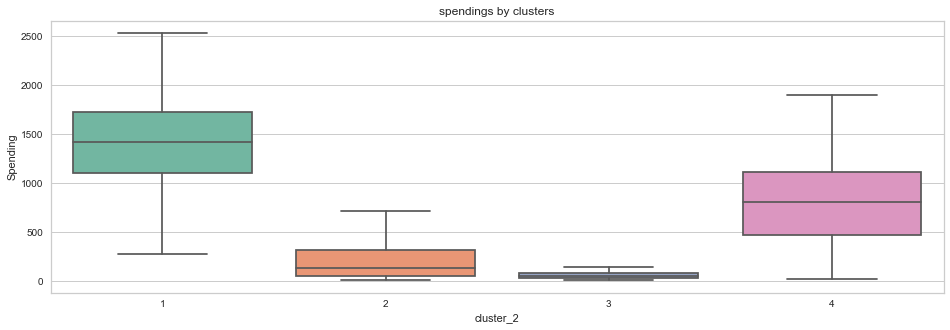

In [52]:
plt.figure(figsize=(16,5))
plt.title(f'spendings by clusters')
ax = sns.boxplot(data=df2, x='cluster_2', y='Spending', palette=PALETTE, showfliers=False)
plt.show()

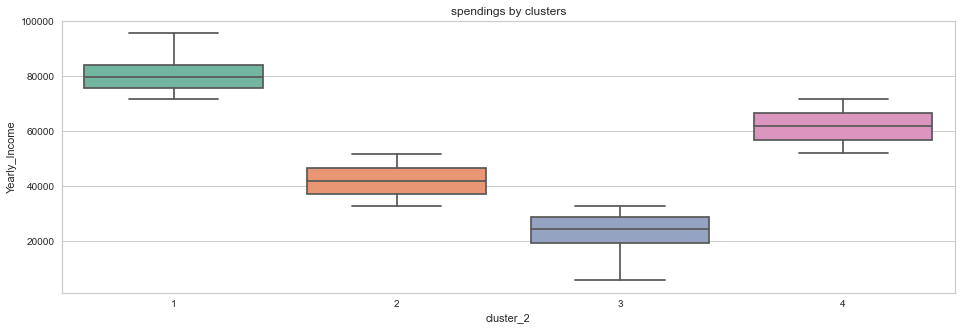

In [54]:
plt.figure(figsize=(16,5))
plt.title(f'spendings by clusters')
ax = sns.boxplot(data=df2, x='cluster_2', y='Yearly_Income', palette=PALETTE, showfliers=False)
plt.show()

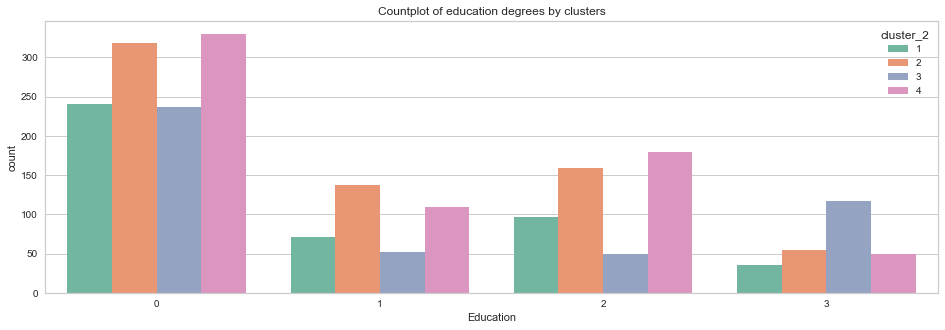

In [55]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of education degrees by clusters')
sns.countplot(data=df2, x='Education', hue='cluster_2', palette=PALETTE)
plt.show()
# {'Bachelor': 0, 'Master': 1, 'PhD': 2, 'Undergraduate': 3}

#### there are most undergraduate in cluster 3

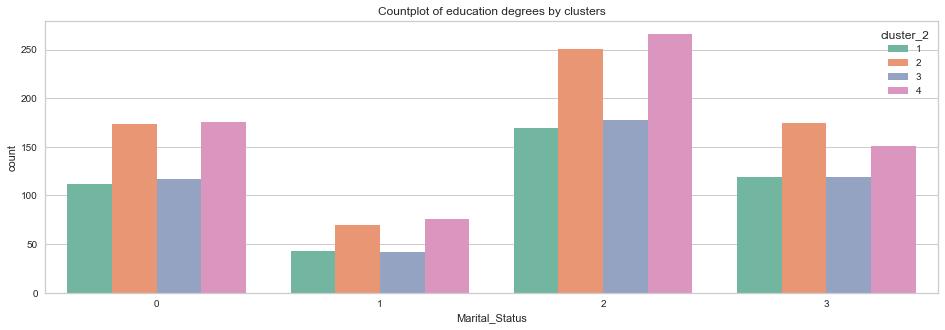

In [113]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of education degrees by clusters')
sns.countplot(data=df2, x='Marital_Status', hue='cluster_2', palette=PALETTE)
plt.show()
# {'Couple': 0, 'Divorced': 1, 'Married': 2, 'Single': 3}

#### no obvious pattern in marital status for clusters

In [56]:
df2.Children.value_counts()

1    1125
0     637
2     421
3      53
Name: Children, dtype: int64

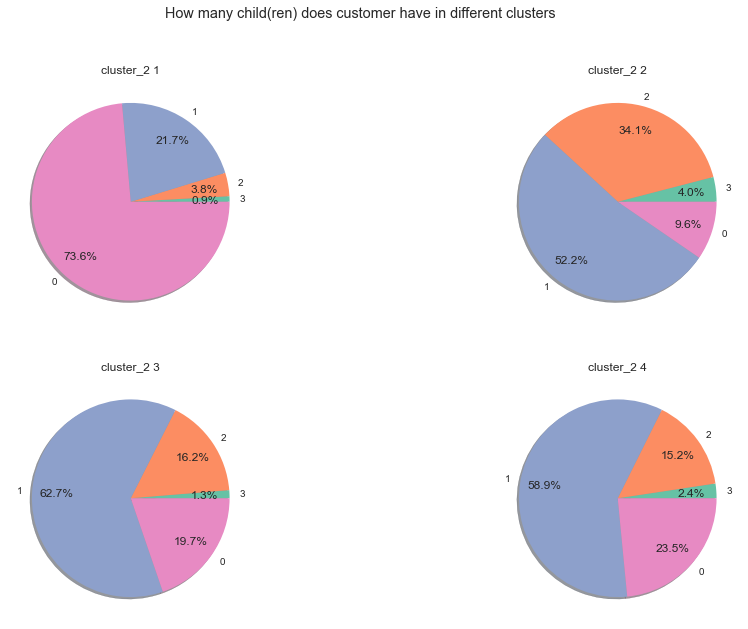

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        sizes = dict(df2.query(f'cluster_2 == {k}')['Children'].value_counts().sort_index(ascending=False))
        axes[i, j].set_title(f"cluster_2 {k}")
        axes[i, j].pie(sizes.values(), labels=list(sizes.keys()), autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=PALETTE)

fig.suptitle('How many child(ren) does customer have in different clusters')
fig.show()

#### There are mostly parents in 2, 3, 4 clusters. And most customers in 1st cluster have no child

In [87]:
# verify if the gragh is well calculated to avoid any mistake
size_check = dict(df2.query(f'cluster_2 == 4')['Children'].value_counts().sort_index(ascending=False))
size_check

{3: 16, 2: 102, 1: 394, 0: 157}

In [88]:
size_total = sum(size_check.values())
size_total

669

In [90]:
for k,v in size_check.items():
    percent = round((v/size_total)*100,1)
    print(f'{k} child(ren) consist of {percent} % of total in cluster 4')
# the gragh is corresponding to the calculation 

3 child(ren) consist of 2.4 % of total in cluster 4
2 child(ren) consist of 15.2 % of total in cluster 4
1 child(ren) consist of 58.9 % of total in cluster 4
0 child(ren) consist of 23.5 % of total in cluster 4


In [107]:
df2.head()

Education  Marital_Status  Yearly_Income  Recency_(days)  Wines  Fruits  \
0          0               3        58138.0              58    635      88   
1          0               3        46344.0              38     11       1   
2          0               0        71613.0              26    426      49   
3          0               0        26646.0              26     11       4   
4          2               2        58293.0              94    173      43   

   Meat  Fish  Sweets  Gold  Web_Deal  Catalog_Deal  Store_Deal  \
0   546   172      88    88         8            10           4   
1     6     2       1     6         1             1           2   
2   127   111      21    42         8             2          10   
3    20    10       3     5         2             0           4   
4   118    46      27    15         5             3           6   

   NumWebVisitsMonth  Complain  Response  Age  Client_since_(month)  Spending  \
0                  7         0         1   57                  33.2      1617   
1                  5         0         0   60                   5.0        27   
2                  4         0         0   49                  16.6       776   
3                  6         0         0   30                   3.0        53   
4                  5         0         0   33                  11.5       422   

   Total_Deal_nondiscount  Children  cluster_income_spending  cluster_2  \
0                      22         0                        2          4   
1                       4         2                        4          2   
2                      20         0                        3          4   
3                       6         1                        1          3   
4                      14         1                        4          4   

   cluster_2_ac  MntTotal  percentWines  percentMeat  percentFruits  \
0             5      1617     39.270254    33.766234       5.442177   
1             5        27     40.740741    22.222222       3.703704   
2             3       776     54.896907    16.365979       6.314433   
3             2        53     20.754717    37.735849       7.547170   
4             5       422     40.995261    27.962085      10.189573   

   percentFish  percentSweets  percentGold  
0    10.636982       5.442177     5.442177  
1     7.407407       3.703704    22.222222  
2    14.304124       2.706186     5.412371  
3    18.867925       5.660377     9.433962  
4    10.900474       6.398104     3.554502

In [111]:
df2.filter(regex='_Deal$',axis=1).sum(axis=0)

Web_Deal         9140
Catalog_Deal     5955
Store_Deal      12959
dtype: int64

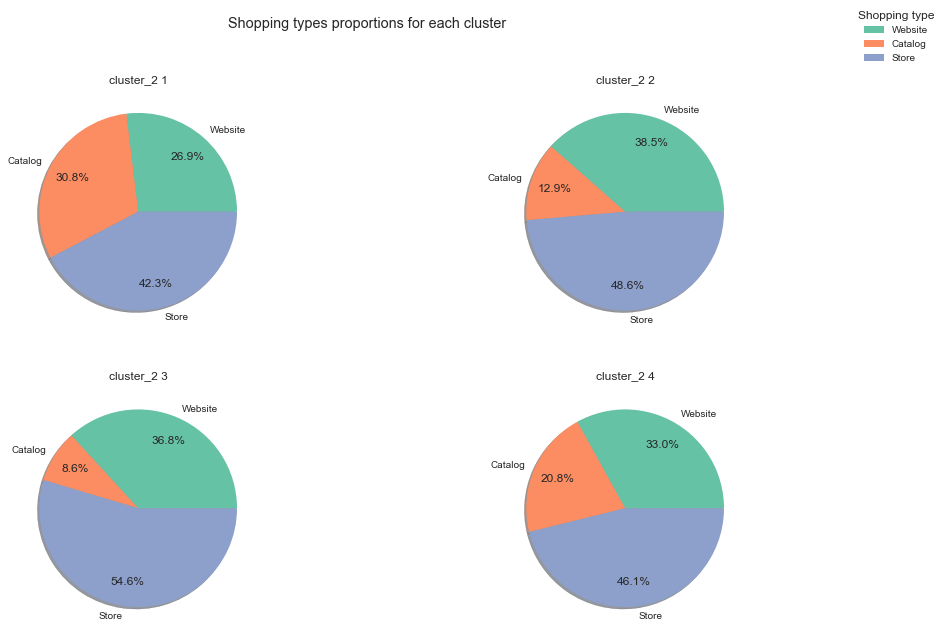

In [112]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        num = df2.query(f'cluster_2 == {k}').filter(regex='_Deal$',axis=1).sum(axis=0)
        sizes = dict(num)
        axes[i, j].set_title(f"cluster_2 {k}")
        axes[i, j].pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=PALETTE)

fig.suptitle('Shopping types proportions for each cluster')
fig.legend(title="Shopping type", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1)) 
fig.show()


#### most people in each clusters buy from store. Customers from 1st and 2nd clusters buy from catalog more than from 1 and 4 clusters. 

#### Maybe catalog products are more expensive, if want to do campaigne about catalogue products, better to target 1st and 2nd clusters customers

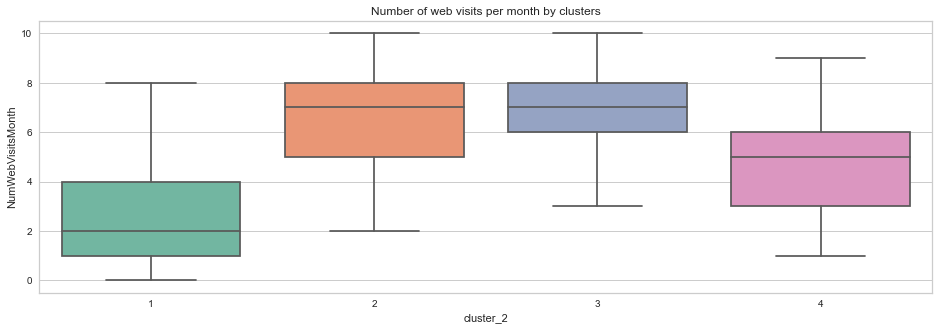

In [114]:
plt.figure(figsize=(16,5))
plt.title(f'Number of web visits per month by clusters')
ax = sns.boxplot(data=df2, x='cluster_2', y='NumWebVisitsMonth', palette=PALETTE, showfliers=False)
plt.show()

#### 2nd and 3rd clusters visits the website the most, will be good to target them in website campaignes

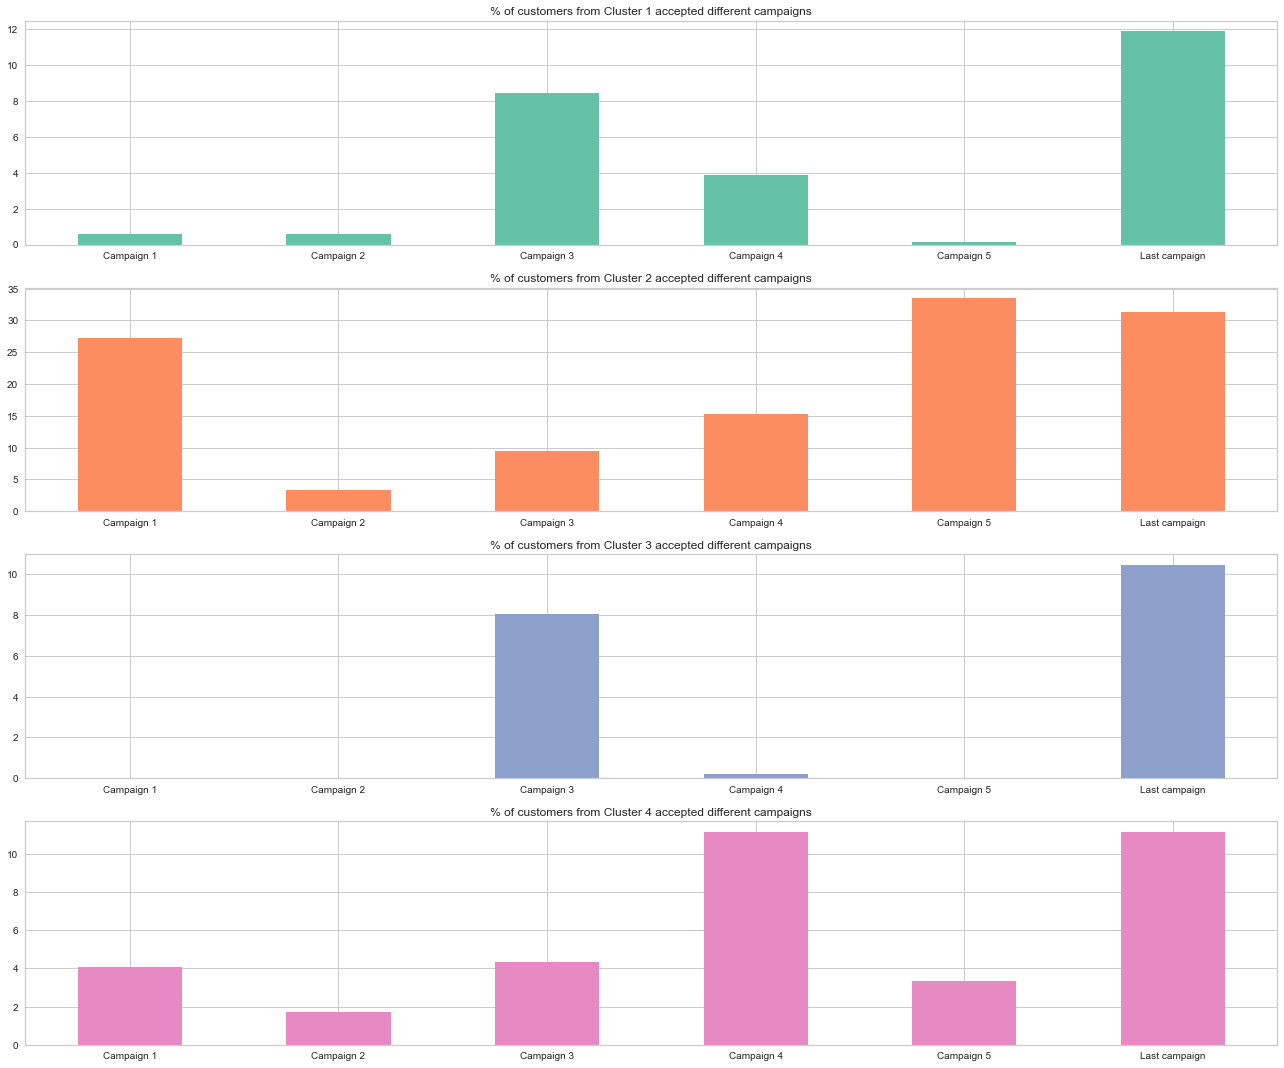

In [125]:
fig, axes = plt.subplots(4, 1, figsize=(16, 20))

for i in range(1, 5):
    ax = (df.query(f'cluster_2 == {i}')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
          .sum() 
          .divide(df.query(f'cluster_2 == {i}').shape[0]).multiply(100)
          .plot(kind='bar', figsize=(18,15), title=f'% of customers from Cluster {i} accepted different campaigns', ax=axes[i-1], color=PALETTE[i-1]))
    ax.set_xticklabels(['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last campaign'], rotation=0)
    
plt.tight_layout()

#### Campaign wise:
The biggest interest in campaign 1: Cluster 2 \
Campaign 2 acceptance in relatively low in any cluster\
The biggest interest in campaign 3 showed Cluster 1 & 3\
Campaign 4 was relatively successful in all clusters besides Cluster 3\
The biggest interest in campaign 5 showed Cluster 2\
The last campaign was succesfull in all clusters

#### Cluster wise:
cluster 2 & 4 accepted more campaignes than other 2 clusters

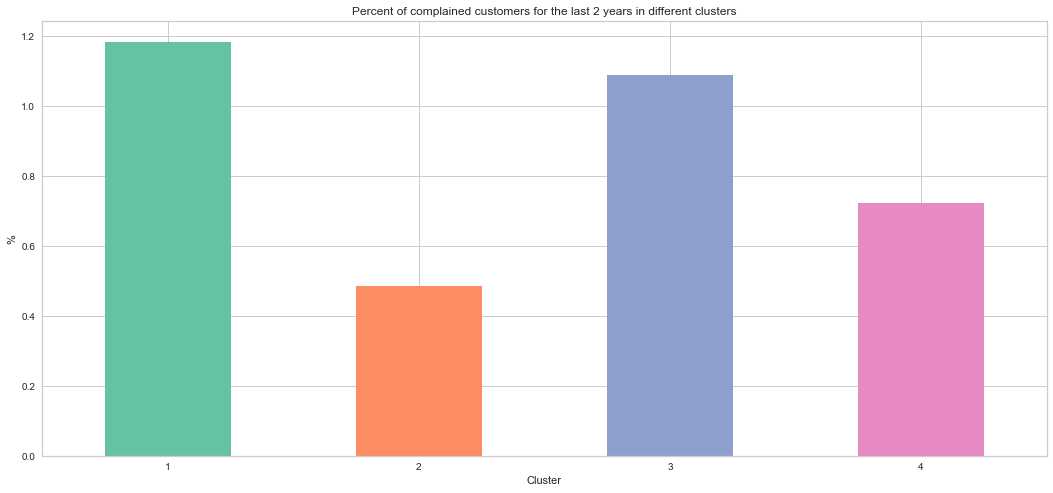

In [126]:
complains_by_cluster = (df2.groupby(by='cluster_2')['Complain'].sum()
                                      .divide(df2['cluster_2'].value_counts())
                                      .multiply(100))

ax = complains_by_cluster.plot(kind='bar', figsize=(18, 8), color=PALETTE[:4], 
                               title='Percent of complained customers for the last 2 years in different clusters',
                               ylabel='%', xlabel='Cluster')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

#### cluster 3 spent the least, but they has the 2nd most complaints

### check for scalling

In [26]:
df3 = scaled_data[['Education', 'Marital_Status', 'Yearly_Income', 'Recency_(days)',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 
       'Web_Deal', 'Catalog_Deal', 'Store_Deal', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Client_since_(month)',
       'Spending', 'Total_Deal_nondiscount', 'Children']]
df3

Education  Marital_Status  Yearly_Income  Recency_(days)     Wines  \
0     -0.869141        1.222432       0.288195        0.306856  0.983228   
1     -0.869141        1.222432      -0.262715       -0.383971 -0.871064   
2     -0.869141       -1.457331       0.917627       -0.798467  0.362159   
3     -0.869141       -1.457331      -1.182829       -0.798467 -0.871064   
4      0.977319        0.329178       0.295435        1.550344 -0.389661   
...         ...             ...            ...             ...       ...   
2231  -0.869141        0.329178       0.432299       -0.107640  1.203128   
2232   0.977319       -1.457331       0.562669        0.237773  0.302727   
2233  -0.869141       -0.564077       0.234150        1.446720  1.794481   
2234   0.054089       -1.457331       0.807015       -1.420212  0.368102   
2235   0.977319        0.329178       0.042075       -0.314889 -0.654136   

        Fruits      Meat      Fish    Sweets      Gold  Web_Deal  \
0     1.554170  1.679746  2.461068  1.475396  0.845669  1.407639   
1    -0.636431 -0.713455 -0.650414 -0.631638 -0.729742 -1.110921   
2     0.572177 -0.177201  1.344595 -0.147262 -0.038098  1.407639   
3    -0.560893 -0.651409 -0.503991 -0.583200 -0.748954 -0.751127   
4     0.421101 -0.217088  0.154911 -0.001950 -0.556831  0.328256   
...        ...       ...       ...       ...       ...       ...   
2231  0.421101  0.066551  0.081700  2.201960  3.900428  1.767433   
2232 -0.661610 -0.607091 -0.687019 -0.655857 -0.691317  1.407639   
2233  0.546997  0.221666 -0.101329 -0.365231 -0.383920 -0.751127   
2234  0.093769  0.208371  0.777208  0.070707  0.326936  0.688050   
2235 -0.586072 -0.469703 -0.650414 -0.631638 -0.441557 -0.391333   

      Catalog_Deal  Store_Deal  NumWebVisitsMonth  Complain  Response  \
0         2.509801   -0.552429           0.692865 -0.095001  2.386338   
1        -0.568970   -1.167738          -0.131421 -0.095001 -0.419052   
2        -0.226884    1.293496          -0.543564 -0.095001 -0.419052   
3        -0.911056   -0.552429           0.280722 -0.095001 -0.419052   
4         0.115201    0.062879          -0.131421 -0.095001 -0.419052   
...            ...         ...                ...       ...       ...   
2231      0.115201   -0.552429          -0.131421 -0.095001 -0.419052   
2232     -0.226884   -0.244775           0.692865 -0.095001 -0.419052   
2233      0.115201    2.216459           0.280722 -0.095001 -0.419052   
2234      0.799373    1.293496          -0.955707 -0.095001 -0.419052   
2235     -0.568970   -0.552429           0.692865 -0.095001  2.386338   

           Age  Client_since_(month)  Spending  Total_Deal_nondiscount  \
0     1.016868              1.975387  1.680176                1.312080   
1     1.273264             -1.666842 -0.962202               -1.186198   
2     0.333146             -0.168620  0.282541                1.034493   
3    -1.290693             -1.925156 -0.918994               -0.908611   
4    -1.034298             -0.827321 -0.305762                0.201734   
...        ...                   ...       ...                     ...   
2231  0.162216              0.128441  1.221499                0.479321   
2232  1.956986             -1.938072 -0.269201                0.340527   
2233 -1.034298             -0.853153  1.055312                0.756907   
2234  1.102333             -0.840237  0.393886                1.173287   
2235  1.273264              1.161697 -0.721231               -0.631025   

      Children  
0    -1.264308  
1     1.395139  
2    -1.264308  
3     0.065416  
4     0.065416  
...        ...  
2231  0.065416  
2232  2.724862  
2233 -1.264308  
2234  0.065416  
2235  1.395139  

[2236 rows x 21 columns]

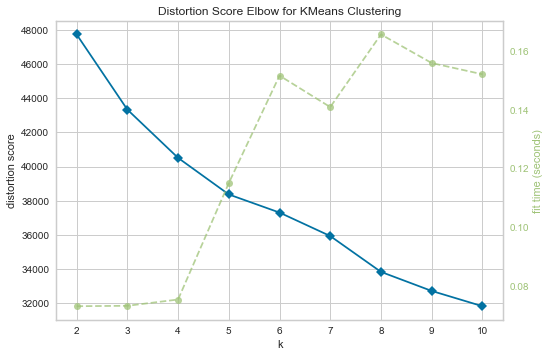

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(scaled_data)
elbow_method.show()

In [78]:
model3 = KMeans(n_clusters=5).fit(scaled_data)
scaled_data['cluster_3'] = model3.predict(scaled_data)+1
scaled_data['cluster_3'].value_counts()

2    985
4    528
3    511
5    192
1     20
Name: cluster_3, dtype: int64

In [79]:
pred3 = model3.fit_predict(scaled_data)

score3 = silhouette_score(scaled_data, pred3)
score3

0.20654582951643535

In [80]:
# the scaled data is not very ideal, so we are not gonna scale it

In [81]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df3)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=['pca1','pca2'])
pca_df

pca1      pca2
0     5.017508 -2.135722
1    -2.898145  0.690707
2     2.285537 -0.754955
3    -2.837853  0.986201
4     0.059794 -0.361848
...        ...       ...
2231  2.957129 -1.179855
2232 -0.899622 -2.164194
2233  1.905695 -0.387219
2234  2.282820 -0.840334
2235 -1.858684 -1.327804

[2236 rows x 2 columns]

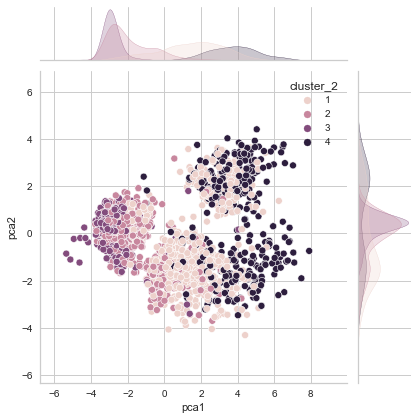

In [82]:
labels = df['cluster_2']
sns.jointplot(data=pca_df, x='pca1', y='pca2', hue=labels)

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
normalized_dataset = scaler.transform(data)

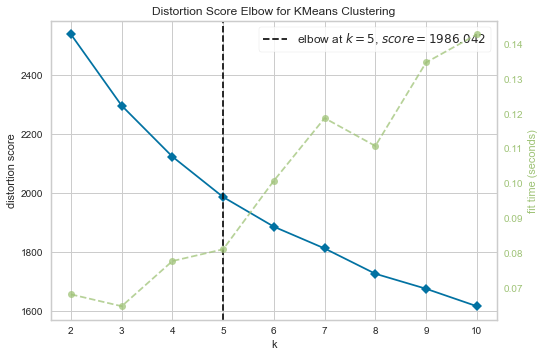

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(normalized_dataset)
elbow_method.show()

In [108]:
model4 = KMeans(n_clusters=4).fit(normalized_dataset)
scaled_data['cluster_4'] = model4.predict(normalized_dataset)+1
scaled_data['cluster_4'].value_counts()

2    1128
4     735
1     225
3     148
Name: cluster_4, dtype: int64

In [109]:
pred4 = model4.fit_predict(normalized_dataset)

score4 = silhouette_score(normalized_dataset, pred4)
score4

0.12028043303397197

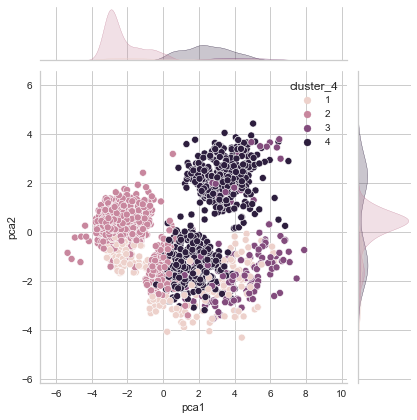

In [110]:
labels = scaled_data['cluster_4']
sns.jointplot(data=pca_df, x='pca1', y='pca2', hue=labels)

In [106]:
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(data)
robust_df = pd.DataFrame(robust_df, columns =data.columns)
robust_df

Education  Marital_Status  Yearly_Income  Recency_(days)     Wines  \
0           0.0        0.333333       0.200529            0.18  0.959917   
1           0.0        0.333333      -0.159337           -0.22 -0.339407   
2           0.0       -0.666667       0.611688           -0.46  0.524727   
3           0.0       -0.666667      -0.760376           -0.46 -0.339407   
4           1.0        0.000000       0.205259            0.90 -0.002082   
...         ...             ...            ...             ...       ...   
2231        0.0        0.000000       0.294661           -0.06  1.114003   
2232        1.0       -0.666667       0.379822            0.14  0.483082   
2233        0.0       -0.333333       0.165226            0.84  1.528371   
2234        0.5       -0.666667       0.539434           -0.82  0.528891   
2235        1.0        0.000000       0.039758           -0.18 -0.187402   

       Fruits      Meat      Fish   Sweets      Gold  Discount_Deal  Web_Deal  \
0     2.50000  2.217593  3.404255  2.50000  1.361702            0.5      1.00   
1    -0.21875 -0.282407 -0.212766 -0.21875 -0.382979            0.0     -0.75   
2     1.28125  0.277778  2.106383  0.40625  0.382979           -0.5      1.00   
3    -0.12500 -0.217593 -0.042553 -0.15625 -0.404255            0.0     -0.50   
4     1.09375  0.236111  0.723404  0.59375 -0.191489            1.5      0.25   
...       ...       ...       ...      ...       ...            ...       ...   
2231  1.09375  0.532407  0.638298  3.43750  4.744681            0.0      1.25   
2232 -0.25000 -0.171296 -0.255319 -0.25000 -0.340426            2.5      1.00   
2233  1.25000  0.694444  0.425532  0.12500  0.000000           -0.5     -0.50   
2234  0.68750  0.680556  1.446809  0.68750  0.787234            0.0      0.50   
2235 -0.15625 -0.027778 -0.212766 -0.21875 -0.063830            0.5     -0.25   

      Catalog_Deal  Store_Deal  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0             2.00        -0.2               0.25           0.0           0.0   
1            -0.25        -0.6              -0.25           0.0           0.0   
2             0.00         1.0              -0.50           0.0           0.0   
3            -0.50        -0.2               0.00           0.0           0.0   
4             0.25         0.2              -0.25           0.0           0.0   
...            ...         ...                ...           ...           ...   
2231          0.25        -0.2              -0.25           0.0           0.0   
2232          0.00         0.0               0.25           0.0           0.0   
2233          0.25         1.6               0.00           0.0           1.0   
2234          0.75         1.0              -0.75           0.0           0.0   
2235         -0.25        -0.2               0.25           0.0           0.0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response       Age  \
0              0.0           0.0           0.0       0.0       1.0  0.722222   
1              0.0           0.0           0.0       0.0       0.0  0.888889   
2              0.0           0.0           0.0       0.0       0.0  0.277778   
3              0.0           0.0           0.0       0.0       0.0 -0.777778   
4              0.0           0.0           0.0       0.0       0.0 -0.611111   
...            ...           ...           ...       ...       ...       ...   
2231           0.0           0.0           0.0       0.0       0.0  0.166667   
2232           0.0           1.0           0.0       0.0       0.0  1.333333   
2233           0.0           0.0           0.0       0.0       0.0 -0.611111   
2234           0.0           0.0           0.0       0.0       0.0  0.777778   
2235           0.0           0.0           0.0       0.0       1.0  0.888889   

      Client_since_(month)  Spending  Total_Deal_nondiscount  Children  \
0                 1.330435  1.249872                0.833333      -1.0   
1                -1.121739 -0.378392  

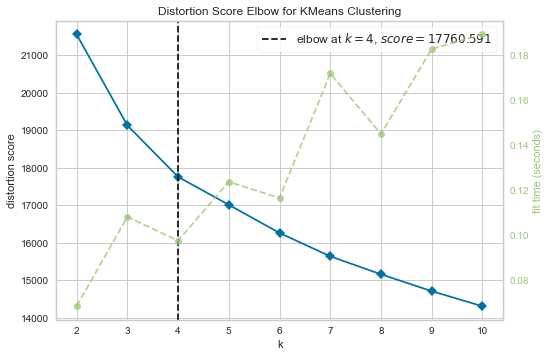

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(robust_df)
elbow_method.show()

In [119]:
model5 = KMeans(n_clusters=4).fit(normalized_dataset)
scaled_data['cluster_5'] = model5.predict(robust_df)+1
scaled_data['cluster_5'].value_counts()

4    1137
2     518
1     479
3     102
Name: cluster_5, dtype: int64

In [120]:
pred5 = model5.fit_predict(robust_df)
score5 = silhouette_score(robust_df, pred5)
score5

0.207489012428303